In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Car_sale_ads.csv',parse_dates=['Offer_publication_date'])

In [3]:
data.head(5)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,2021-04-05,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,2021-03-05,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,2021-03-05,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,2021-04-30,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,2021-04-30,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    208304 non-null  int64         
 1   Price                    208304 non-null  int64         
 2   Currency                 208304 non-null  object        
 3   Condition                208304 non-null  object        
 4   Vehicle_brand            208304 non-null  object        
 5   Vehicle_model            208304 non-null  object        
 6   Vehicle_version          138082 non-null  object        
 7   Vehicle_generation       147860 non-null  object        
 8   Production_year          208304 non-null  int64         
 9   Mileage_km               207321 non-null  float64       
 10  Power_HP                 207661 non-null  float64       
 11  Displacement_cm3         206338 non-null  float64       
 12  Fuel_type       

In [5]:
categorical_columns=[]
for column in data.columns:
    if data[column].dtype =='object':
        categorical_columns.append(column)
data_cat=data[categorical_columns]
data_cat.head(5)
        
        

,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Fuel_type,Drive,Transmission,Type,Colour,Origin_country,First_owner,First_registration_date,Offer_location,Features
0,PLN,New,Abarth,595,NaN,NaN,Gasoline,Front wheels,Manual,small_cars,gray,NaN,NaN,NaN,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,PLN,Used,Abarth,Other,NaN,NaN,Gasoline,Front wheels,Manual,coupe,silver,NaN,NaN,NaN,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,PLN,Used,Abarth,500,NaN,NaN,Gasoline,NaN,Automatic,small_cars,silver,NaN,NaN,NaN,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,PLN,Used,Abarth,500,NaN,NaN,Gasoline,Front wheels,Manual,small_cars,gray,NaN,NaN,NaN,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,PLN,New,Abarth,595,NaN,NaN,Gasoline,NaN,Manual,small_cars,blue,NaN,NaN,NaN,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [6]:
label_encoders = data_cat

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    208304 non-null  int64         
 1   Price                    208304 non-null  int64         
 2   Currency                 208304 non-null  int32         
 3   Condition                208304 non-null  int32         
 4   Vehicle_brand            208304 non-null  int32         
 5   Vehicle_model            208304 non-null  int32         
 6   Vehicle_version          208304 non-null  int32         
 7   Vehicle_generation       208304 non-null  int32         
 8   Production_year          208304 non-null  int64         
 9   Mileage_km               207321 non-null  float64       
 10  Power_HP                 207661 non-null  float64       
 11  Displacement_cm3         206338 non-null  float64       
 12  Fuel_type       

In [8]:
data.isnull().mean()*100

Index                       0.000000
Price                       0.000000
Currency                    0.000000
Condition                   0.000000
Vehicle_brand               0.000000
Vehicle_model               0.000000
Vehicle_version             0.000000
Vehicle_generation          0.000000
Production_year             0.000000
Mileage_km                  0.471906
Power_HP                    0.308683
Displacement_cm3            0.943813
Fuel_type                   0.000000
CO2_emissions              54.851083
Drive                       0.000000
Transmission                0.000000
Type                        0.000000
Doors_number                0.713861
Colour                      0.000000
Origin_country              0.000000
First_owner                 0.000000
First_registration_date     0.000000
Offer_publication_date      0.000000
Offer_location              0.000000
Features                    0.000000
dtype: float64

In [9]:
cleaned_data=data[data['CO2_emissions']!=np.nan]

In [10]:
cleaned_data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,1,0,0,124,19056,569,2021,1.0,...,1,7,3.0,6,37,1,8441,2021-04-05,12284,177210
1,1,43500,1,1,0,771,19056,569,1974,59000.0,...,1,4,2.0,10,37,1,8441,2021-03-05,11950,177210
2,2,44900,1,1,0,114,19056,569,2018,52000.0,...,0,7,3.0,10,37,1,8441,2021-03-05,10622,59333
3,3,39900,1,1,0,114,19056,569,2012,29000.0,...,1,7,3.0,6,37,1,8441,2021-04-30,3544,76996
4,4,97900,1,0,0,124,19056,569,2021,600.0,...,1,7,3.0,2,37,1,8441,2021-04-30,12225,156036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,1,1,107,771,19056,569,2014,40000.0,...,1,7,1.0,8,37,1,8441,2021-04-30,12260,177210
208300,208300,10900,1,1,107,771,19056,569,1970,63518.0,...,1,8,4.0,8,26,1,8441,2021-02-05,11445,177210
208301,208301,6900,1,1,107,771,19056,569,1977,11880.0,...,1,0,3.0,9,37,1,3041,2021-04-28,11859,177210
208302,208302,5700,1,1,107,771,19056,569,1986,100000.0,...,1,5,2.0,2,37,1,8441,2021-04-24,4617,177210


In [11]:
cleaned_data.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')

In [12]:
cleaned_data.isnull().mean()*100

Index                       0.000000
Price                       0.000000
Currency                    0.000000
Condition                   0.000000
Vehicle_brand               0.000000
Vehicle_model               0.000000
Vehicle_version             0.000000
Vehicle_generation          0.000000
Production_year             0.000000
Mileage_km                  0.471906
Power_HP                    0.308683
Displacement_cm3            0.943813
Fuel_type                   0.000000
CO2_emissions              54.851083
Drive                       0.000000
Transmission                0.000000
Type                        0.000000
Doors_number                0.713861
Colour                      0.000000
Origin_country              0.000000
First_owner                 0.000000
First_registration_date     0.000000
Offer_publication_date      0.000000
Offer_location              0.000000
Features                    0.000000
dtype: float64

In [13]:
cleaned_data.drop(columns=['CO2_emissions'],inplace=True)

In [14]:
cleaned_data.isnull().mean()*100

Index                      0.000000
Price                      0.000000
Currency                   0.000000
Condition                  0.000000
Vehicle_brand              0.000000
Vehicle_model              0.000000
Vehicle_version            0.000000
Vehicle_generation         0.000000
Production_year            0.000000
Mileage_km                 0.471906
Power_HP                   0.308683
Displacement_cm3           0.943813
Fuel_type                  0.000000
Drive                      0.000000
Transmission               0.000000
Type                       0.000000
Doors_number               0.713861
Colour                     0.000000
Origin_country             0.000000
First_owner                0.000000
First_registration_date    0.000000
Offer_publication_date     0.000000
Offer_location             0.000000
Features                   0.000000
dtype: float64

In [15]:
columns_with_missing_values = cleaned_data.columns[cleaned_data.isnull().any()].tolist()


for column in columns_with_missing_values:
    column_mean = cleaned_data[column].mean()
    cleaned_data[column].fillna(column_mean, inplace=True)


In [16]:
cleaned_data.isnull().mean()*100

Index                      0.0
Price                      0.0
Currency                   0.0
Condition                  0.0
Vehicle_brand              0.0
Vehicle_model              0.0
Vehicle_version            0.0
Vehicle_generation         0.0
Production_year            0.0
Mileage_km                 0.0
Power_HP                   0.0
Displacement_cm3           0.0
Fuel_type                  0.0
Drive                      0.0
Transmission               0.0
Type                       0.0
Doors_number               0.0
Colour                     0.0
Origin_country             0.0
First_owner                0.0
First_registration_date    0.0
Offer_publication_date     0.0
Offer_location             0.0
Features                   0.0
dtype: float64

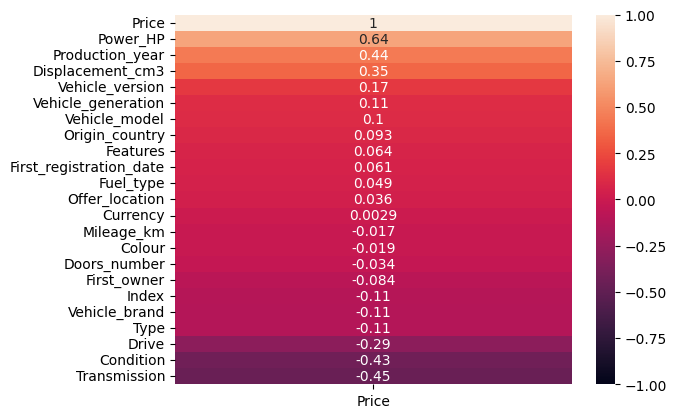

In [17]:
sns.heatmap(cleaned_data.corr()[['Price']].sort_values(by='Price',ascending=False),vmax=1, vmin=-1,annot=True);

In [18]:
cleaned_data.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Origin_country', 'First_owner', 'First_registration_date',
       'Offer_publication_date', 'Offer_location', 'Features'],
      dtype='object')

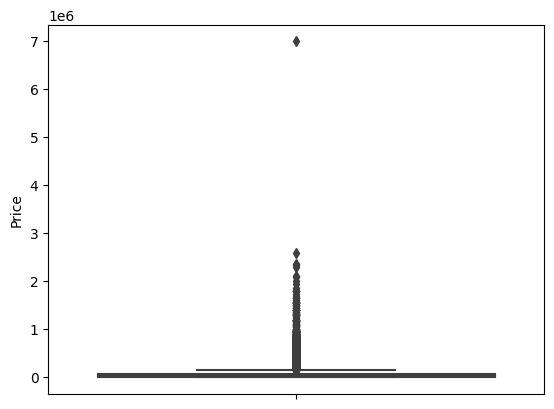

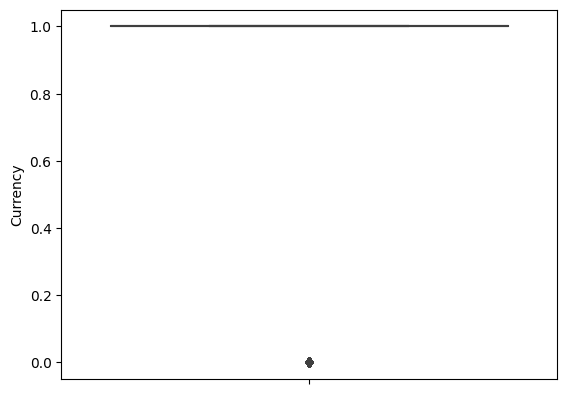

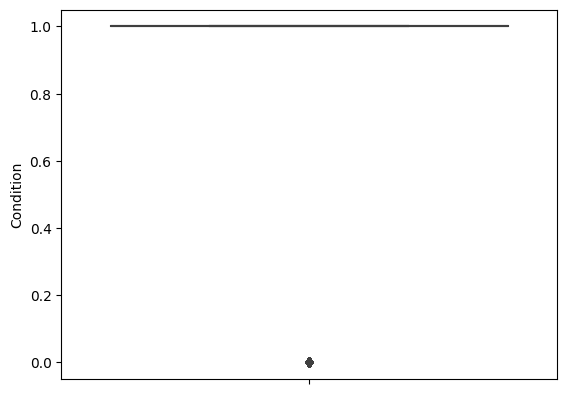

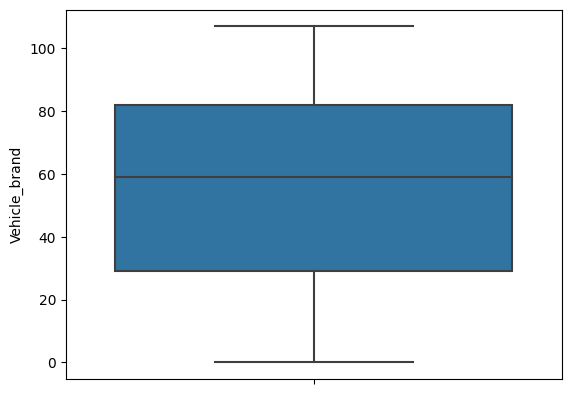

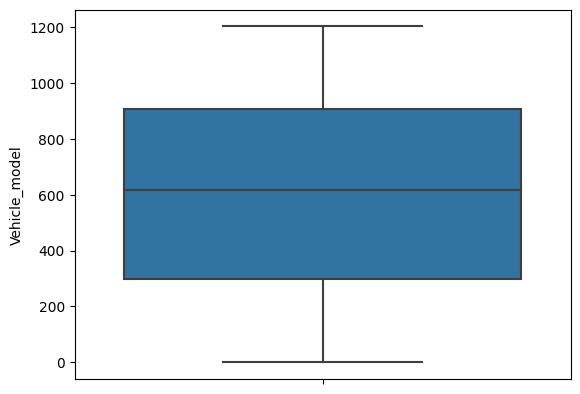

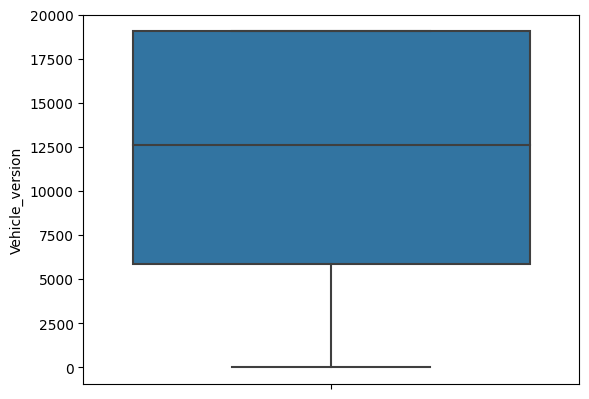

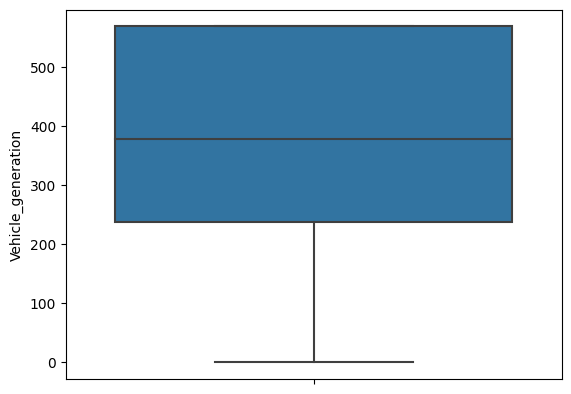

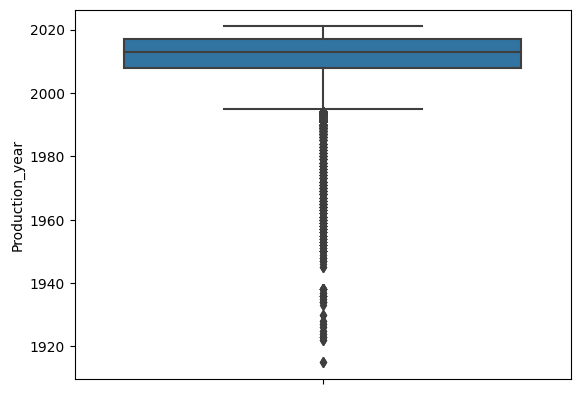

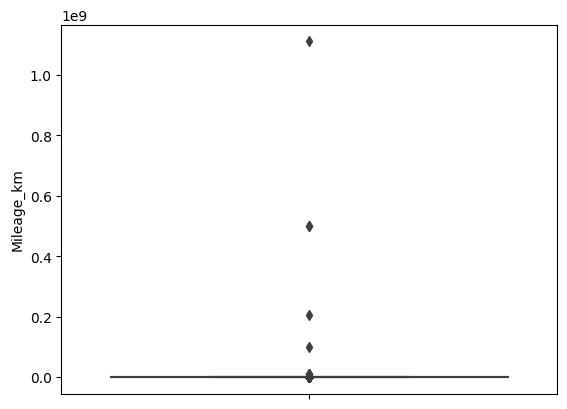

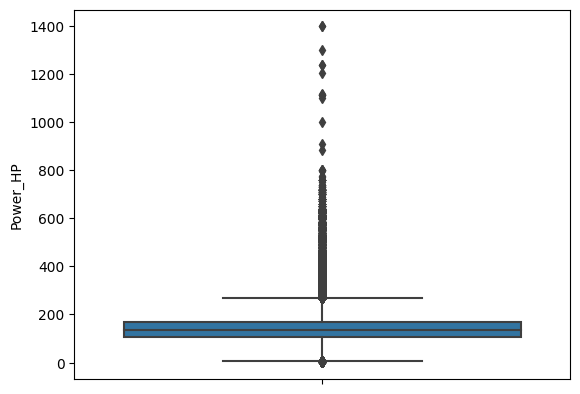

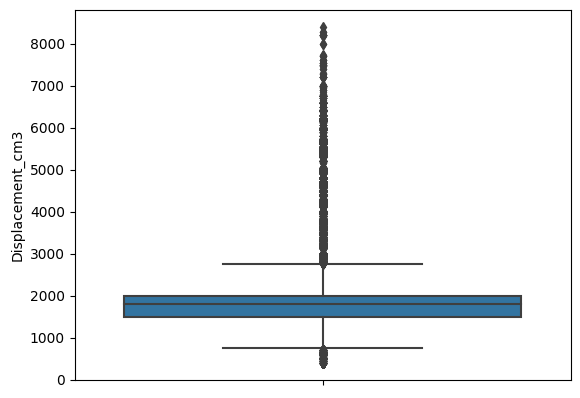

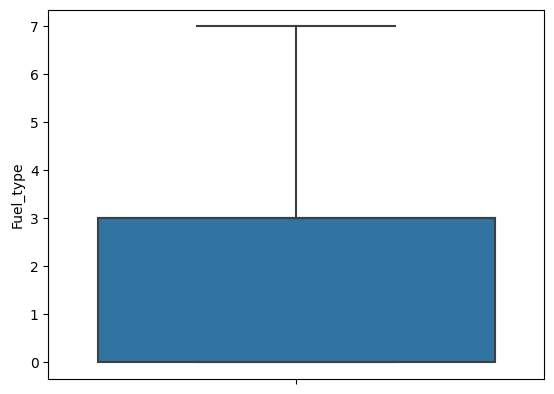

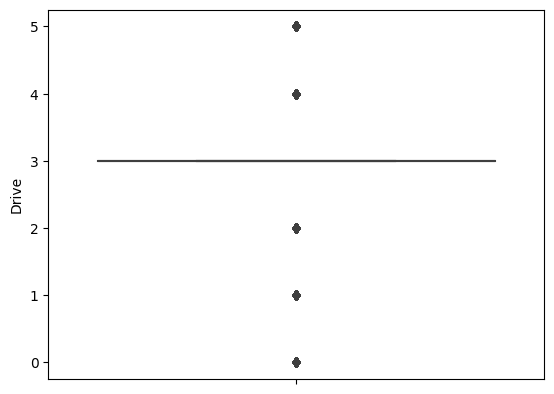

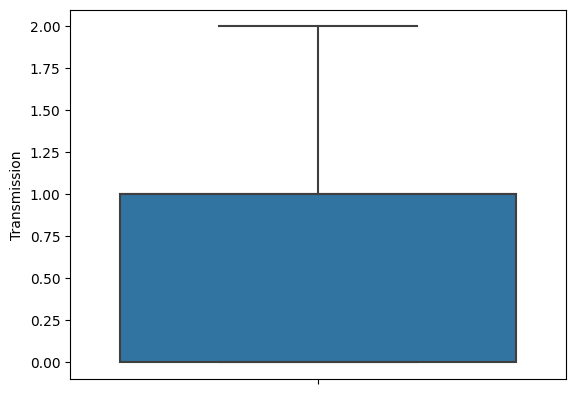

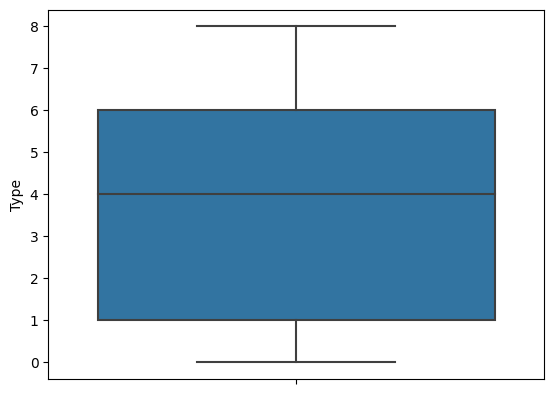

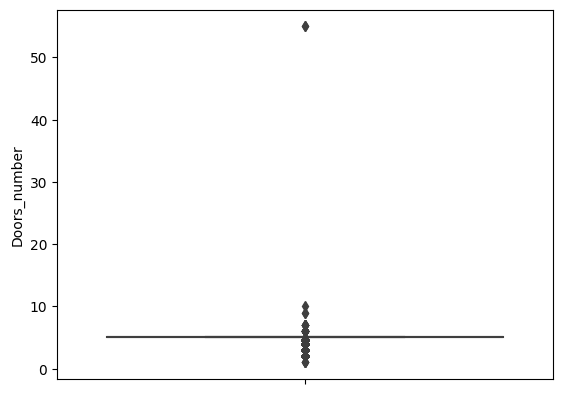

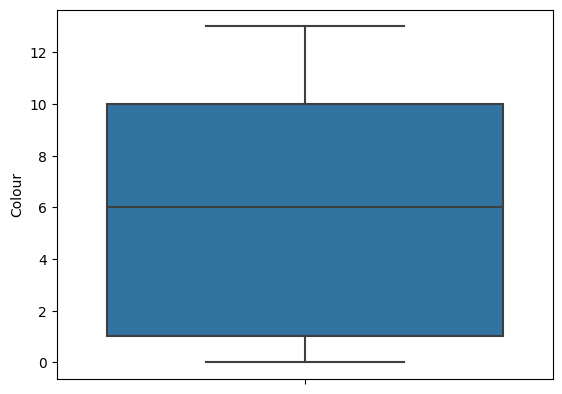

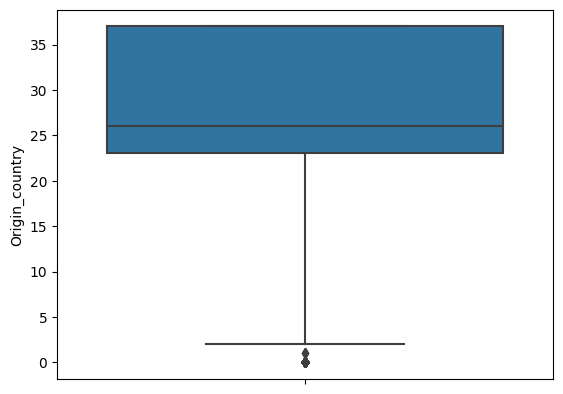

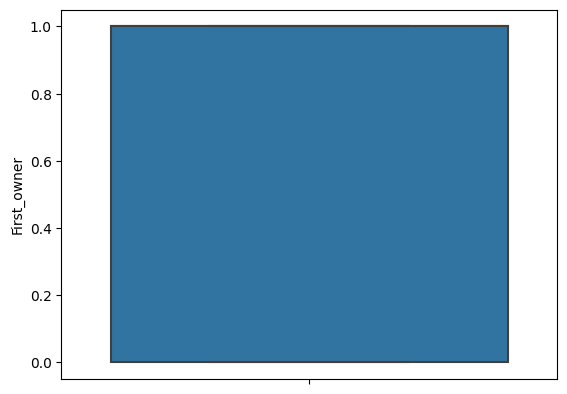

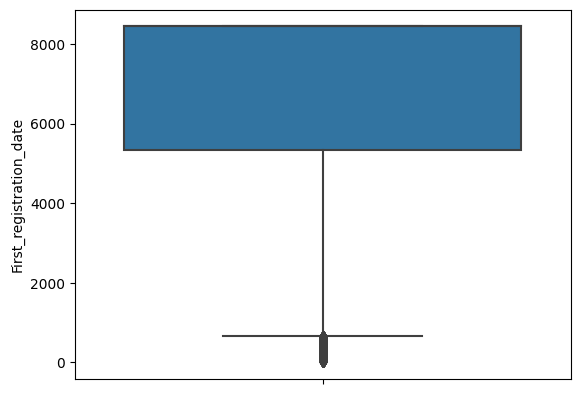

In [35]:
regg_list=['Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Origin_country', 'First_owner', 'First_registration_date']

for i in regg_list:
    sns.boxplot(y=cleaned_data[i])
    plt.show()

In [44]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR= Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [45]:
IQR_LIMIT=['Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Origin_country', 'First_owner', 'First_registration_date']
for i in IQR_LIMIT:
    UL,LL=outlier_limit(cleaned_data[i])
    cleaned_data[i]=np.where((cleaned_data[i]>UL)|(cleaned_data[i]<LL),np.nan,cleaned_data[i])

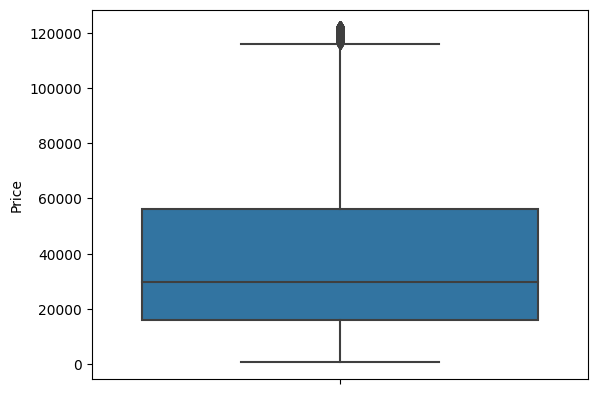

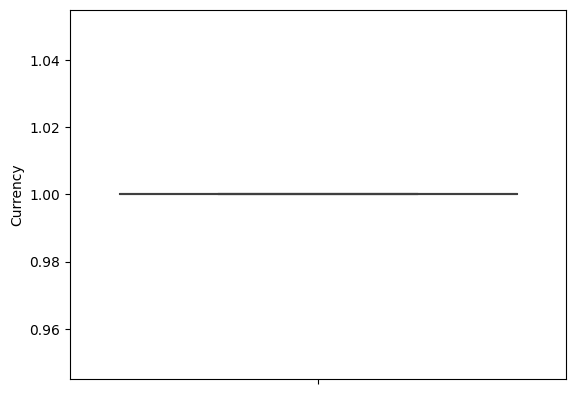

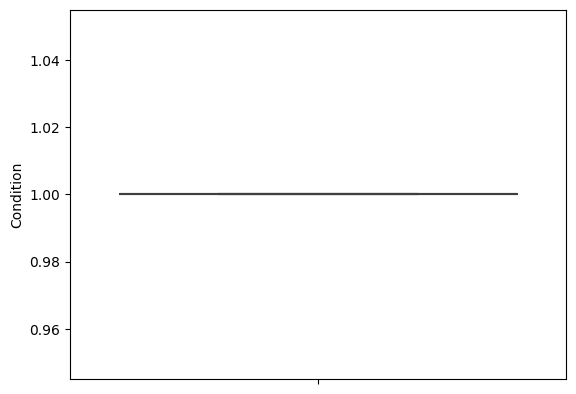

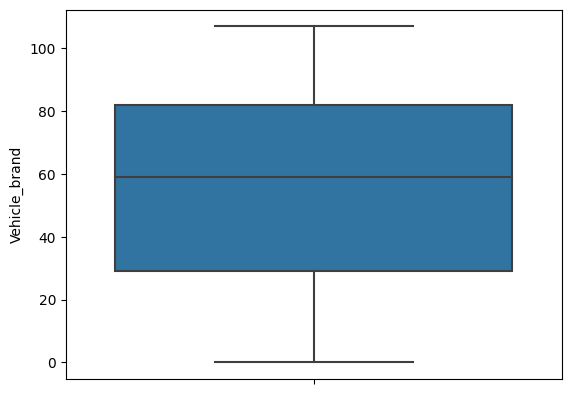

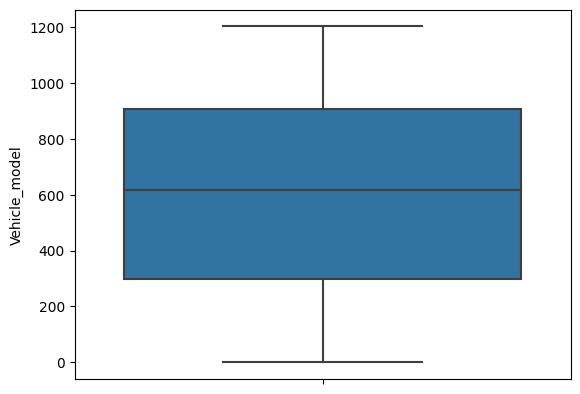

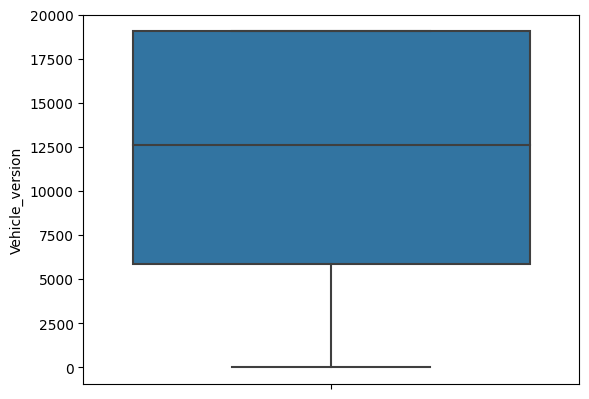

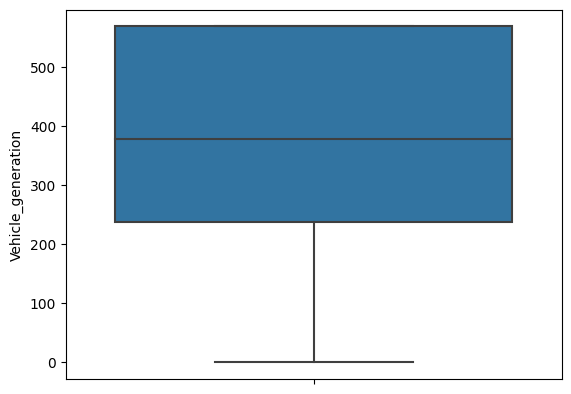

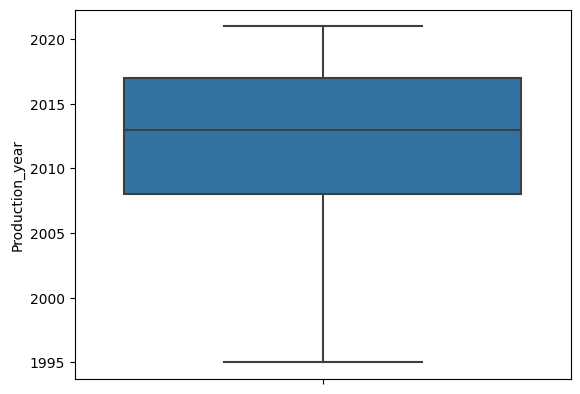

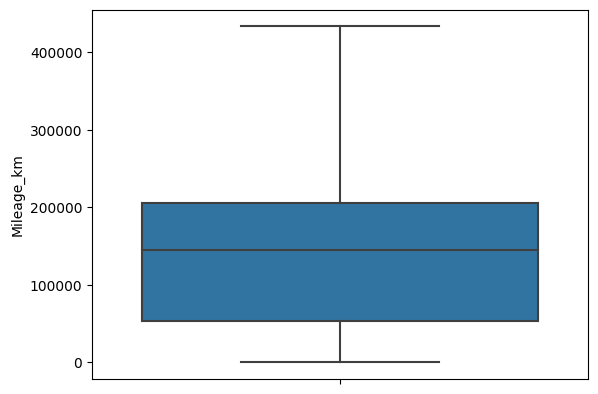

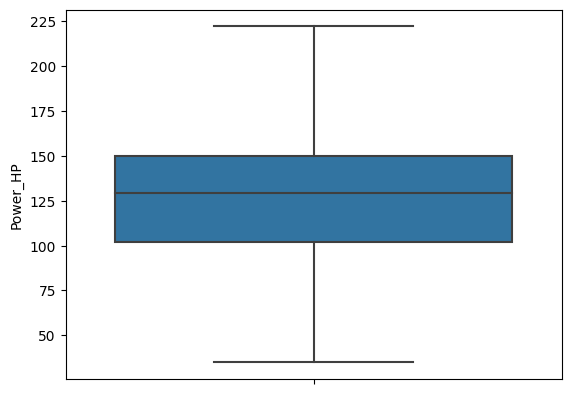

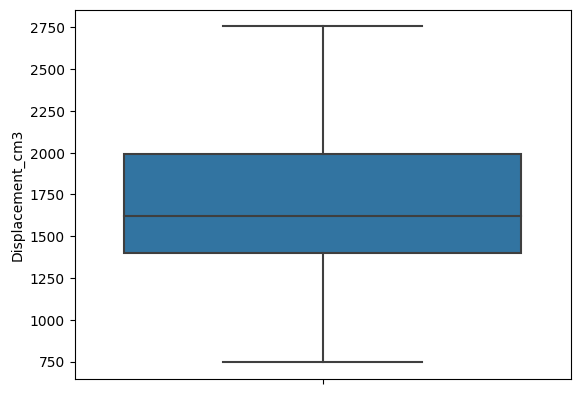

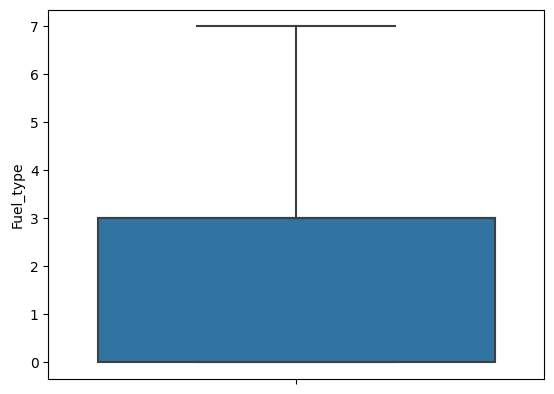

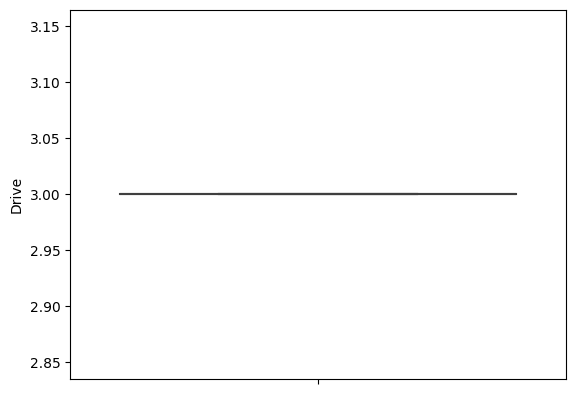

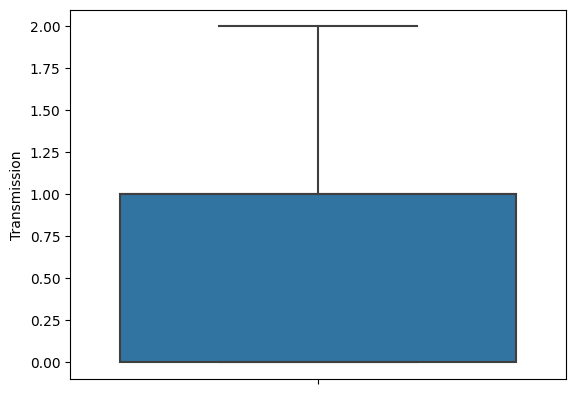

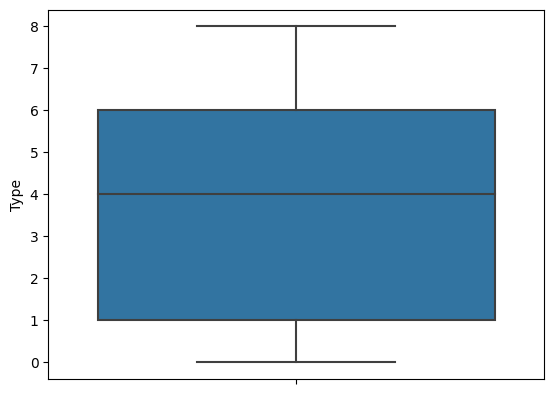

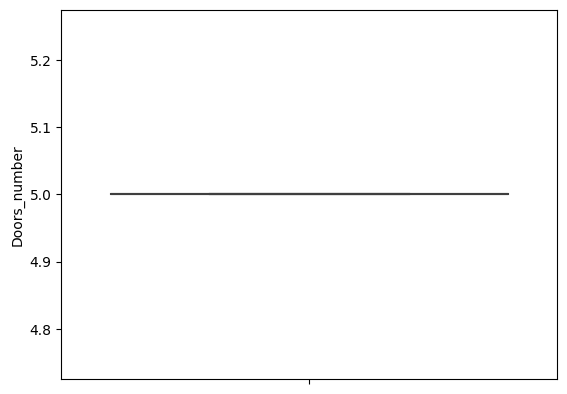

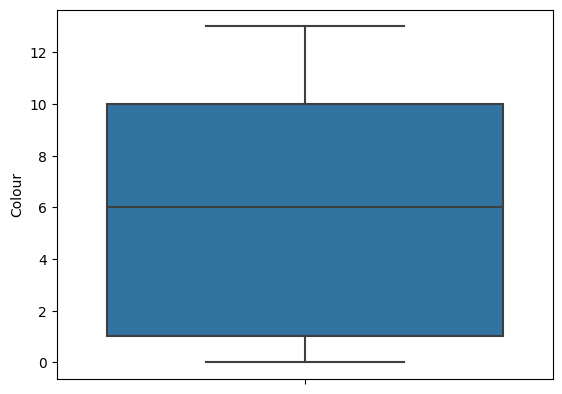

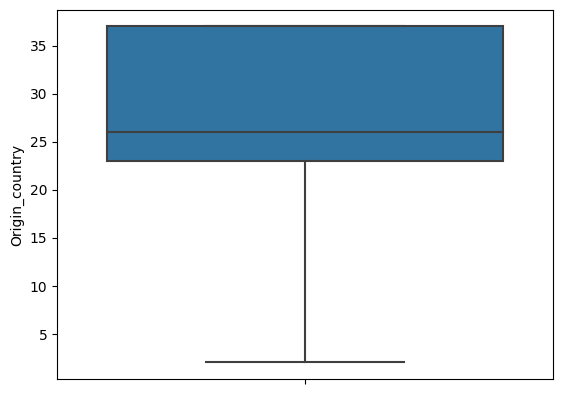

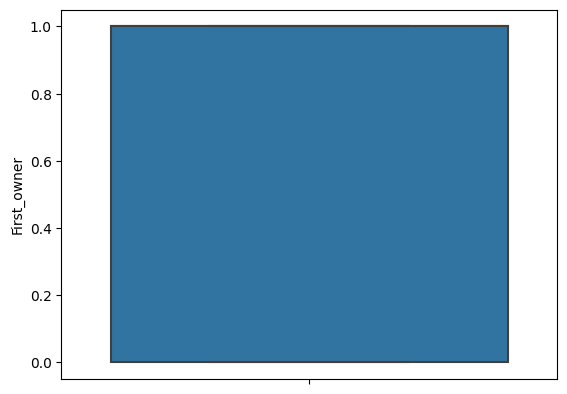

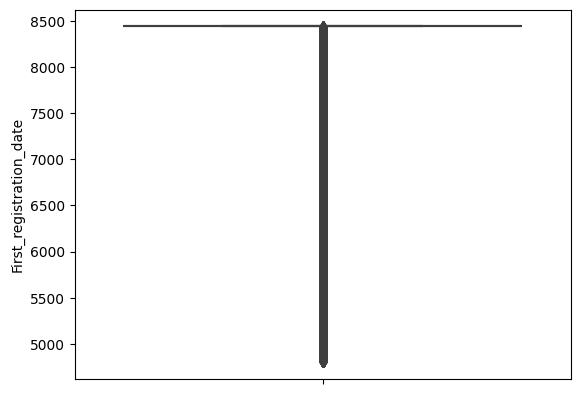

In [46]:
for i in regg_list:
    sns.boxplot(y=cleaned_data[i])
    plt.show()

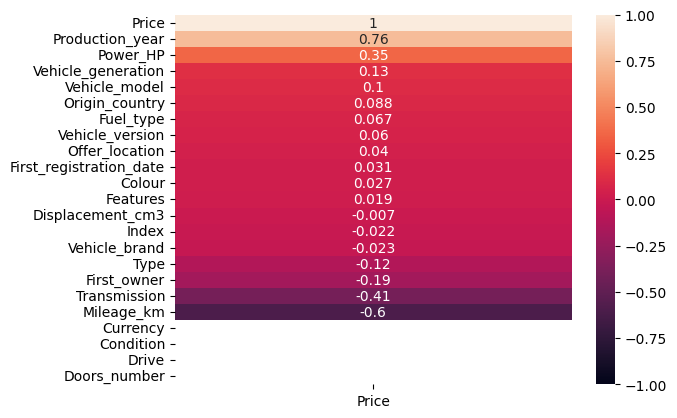

In [47]:
sns.heatmap(cleaned_data.corr()[['Price']].sort_values(by='Price',ascending=False),vmax=1, vmin=-1,annot=True);

In [48]:
cleaned_data.isnull().mean()*100

Index                       0.000000
Price                      12.979588
Currency                    0.129618
Condition                  12.219641
Vehicle_brand               0.000000
Vehicle_model               0.000000
Vehicle_version             0.000000
Vehicle_generation          0.000000
Production_year             1.315385
Mileage_km                  0.298602
Power_HP                   12.554248
Displacement_cm3           10.479876
Fuel_type                   0.000000
Drive                      32.817421
Transmission                0.000000
Type                        0.000000
Doors_number               23.758545
Colour                      0.000000
Origin_country              0.586163
First_owner                 0.000000
First_registration_date    22.490687
Offer_publication_date      0.000000
Offer_location              0.000000
Features                    0.000000
dtype: float64

In [49]:
cleaned_data.dropna(inplace=True)

In [50]:
cleaned_data.isnull().mean()*100

Index                      0.0
Price                      0.0
Currency                   0.0
Condition                  0.0
Vehicle_brand              0.0
Vehicle_model              0.0
Vehicle_version            0.0
Vehicle_generation         0.0
Production_year            0.0
Mileage_km                 0.0
Power_HP                   0.0
Displacement_cm3           0.0
Fuel_type                  0.0
Drive                      0.0
Transmission               0.0
Type                       0.0
Doors_number               0.0
Colour                     0.0
Origin_country             0.0
First_owner                0.0
First_registration_date    0.0
Offer_publication_date     0.0
Offer_location             0.0
Features                   0.0
dtype: float64

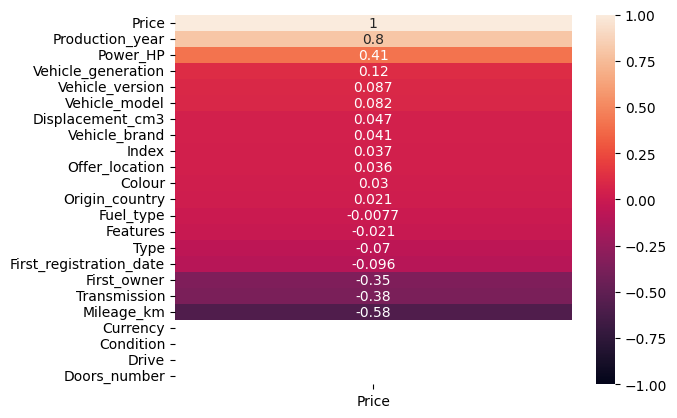

In [51]:
sns.heatmap(cleaned_data.corr()[['Price']].sort_values(by='Price',ascending=False),vmax=1, vmin=-1,annot=True);

In [53]:
data_reggression=cleaned_data[['Production_year','Power_HP','Price']]
data_reggression

,Production_year,Power_HP,Price
54,2012.0,181.0,28900.0
60,2012.0,201.0,45900.0
202,2006.0,150.0,4990.0
205,2011.0,120.0,33900.0
209,2013.0,105.0,26999.0
...,...,...,...
208263,2014.0,116.0,39000.0
208264,2015.0,120.0,51500.0
208265,2013.0,136.0,47990.0
208268,2011.0,163.0,57900.0


In [55]:
x=cleaned_data[['Production_year','Power_HP']].values
y=cleaned_data[['Price']].values

In [59]:
sc=StandardScaler()

In [61]:
x=sc.fit_transform(x)

In [62]:
models={"linearRegression":LinearRegression(),
       "Ridge":Ridge(),
       "Lasso":Lasso(),
       "LinearSVR":LinearSVR(),
       "DecisionTreeRegressor":DecisionTreeRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [63]:
for name,model in models.items():
    scores=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model: {}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print('Avg RMSE:',rmse_average)
    print("*"*100)

cross validation model: linearRegression
Avg RMSE: 12181.141447551701
****************************************************************************************************
cross validation model: Ridge
Avg RMSE: 12181.137512757261
****************************************************************************************************
cross validation model: Lasso
Avg RMSE: 12181.133463203949
****************************************************************************************************
cross validation model: LinearSVR
Avg RMSE: 16109.477145046098
****************************************************************************************************
cross validation model: DecisionTreeRegressor
Avg RMSE: 9916.83365559285
****************************************************************************************************
cross validation model: AdaBoostRegressor
Avg RMSE: 10708.380296392297
****************************************************************************************************

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [65]:
model_01=RandomForestRegressor()

In [66]:
model_01.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
y_pred=model_01.predict(x_test)

In [71]:
result=pd.DataFrame(zip(y_test,y_pred),columns=['actual','prediction'], dtype=float)

In [72]:
result

,actual,prediction
0,14760.0,18898.836417
1,21000.0,21541.098467
2,70080.0,83358.559328
3,24900.0,14861.384863
4,38900.0,43480.689737
...,...,...
13652,34900.0,32178.483858
13653,6000.0,9591.752741
13654,7800.0,8262.746974
13655,16900.0,15082.957309


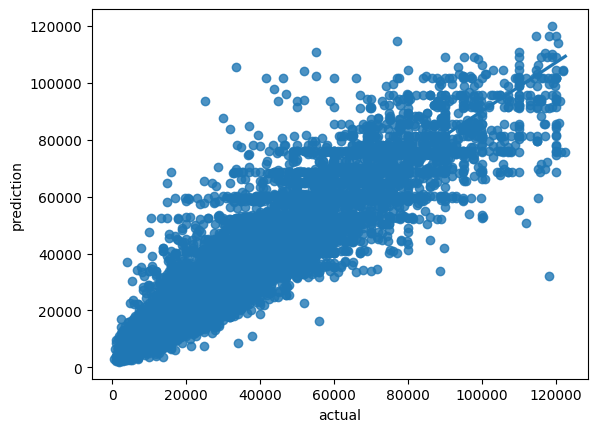

In [78]:
sns.regplot(data=result,x='actual',y='prediction')
plt.show()

In [79]:
result['Error'] = result.actual - result.prediction

In [80]:
result

,actual,prediction,Error
0,14760.0,18898.836417,-4138.836417
1,21000.0,21541.098467,-541.098467
2,70080.0,83358.559328,-13278.559328
3,24900.0,14861.384863,10038.615137
4,38900.0,43480.689737,-4580.689737
...,...,...,...
13652,34900.0,32178.483858,2721.516142
13653,6000.0,9591.752741,-3591.752741
13654,7800.0,8262.746974,-462.746974
13655,16900.0,15082.957309,1817.042691


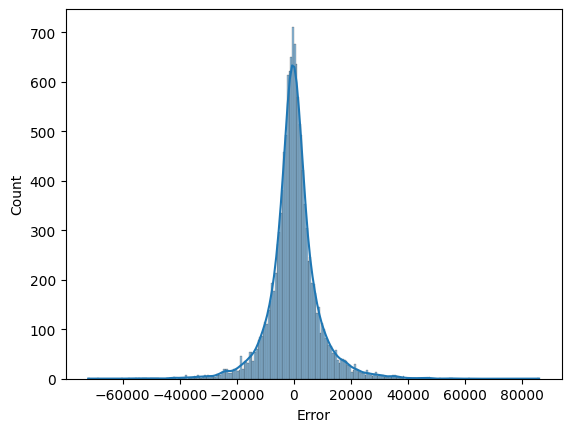

In [85]:
sns.histplot(data=result, x='Error', kde=True)
plt.show()

Model Performance: The predicted values show that the model is doing reasonably well in some cases, but there are instances where the predictions deviate significantly from the actual values. This indicates that the model may have some level of accuracy, but it might need further improvement to reduce the errors.

Positive and Negative Errors: here both positive and negative errors in the predictions. Positive errors mean that the model is overestimating the target variable compared to the actual values. On the other hand, negative errors indicate that the model is underestimating the target variable.

Outliers: Some of the errors seem to be quite large, indicating potential outliers in the dataset. These outliers could be influencing the model's performance and need to be further investigated.

Mean Error: we can calculate the mean error (average of all errors) to get an overall idea of how well the model is performing on average.

Root Mean Squared Error (RMSE): Calculating the root mean squared error can provide a more intuitive measure of the model's performance in terms of the units of the target variable. RMSE will give an idea of how far, on average, the predictions are from the actual values.

Further Analysis: Depending on the context of your problem, we can also analyze the distribution of errors, identify patterns in specific cases where the model performed poorly, and check for any systematic biases.

Overall, these results suggest that while the model shows promise, there are areas where it can be improved. It's important to consider possible model enhancements, data preprocessing, feature engineering, and tuning hyperparameters to potentially increase the model's accuracy and reduce errors. Additionally, investigating outliers and understanding the context of the problem can help in refining the model's performance.